In [1]:
import modin.pandas as pd     
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from imblearn.over_sampling import SMOTE

from pycaret.classification import *

pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('archive/train.csv')
test = pd.read_csv('archive/test.csv')

In [3]:
X = data.drop('y', axis=1)
y = data['y']

In [4]:
data.head(10)

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1
5,65,18,-999,-999,16114,208,-999,-999,-999,1,63,16938,7322,1247,2,58,58,22,5,943,2,1301,0,2,0,0,6,0,9,3,2,0,13,5,9,474,2,21,0,4,2,3,28,4,1,0,0,0,0,1,0,0,15,1,1,0.221367,0.497,0.101075,0.026035,-999.000000,0.057837,0.391608,0.080977,0.897074,0.019915,-999.000000,-999.00000,-999.000000,0.198529,0
6,69,5,89,1906,28845,9676,64,35,27,3,63,15320,3658,26,26,40,42,8,4,22,26,32,5,3,0,1,4,0,24,4,1,0,14,5,53,197,2,3,0,4,2,3,24,5,1,0,0,0,0,0,0,1,30,1,1,0.205834,0.014,1.000000,0.007534,0.141888,-999.000000,0.145790,0.035340,0.867810,0.014831,-999.000000,-999.00000,0.514706,0.224265,0
7,84,5,-999,-999,25373,9048,-999,-999,-999,1,63,27988,7556,399,26,13,11,11,4,307,26,426,4,3,0,0,7,0,24,4,2,0,21,3,55,607,21,7,8,4,9,3,27,8,1,0,0,0,0,0,0,0,34,1,1,0.273533,0.213,0.451613,0.018639,0.247192,-999.000000,0.703803,0.124198,0.828456,0.030033,-999.000000,-999.00000,-999.000000,0.301471,0
8,97,4,44,539,31622,50,2969,27,20,3,14,3359,8272,2292,19,22,22,10,4,1799,19,2422,5,3,0,1,7,1,25,4,1,0,20,4,30,9,31,7,0,4,10,3,19,9,1,0,0,0,0,0,0,0,16,3,1,0.204374,0.295,0.367742,0.067069,0.184499,0.160714,0.252895,0.050784,0.857719,0.015547,-999.000000,-999.00000,0.220588,0.143382,0
9,99,21,53,577,13528,1109,1746,35,27,3,63,13794,914,1317,26,1,3,3,3,1573,26,1372,5,3,2,4,1,0,24,4,2,0,16,5,58,591,2,2,0,4,4,3,26,7,1,0,0,0,0,0,1,0,15,1,1,0.206385,0.773,0.101075,0.131622,0.175693,-999.000000,0.492785,0.052694,0.891019,0.017476,-999.000000,-999.00000,0.161765,0.106618,0


In [4]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [5]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [7]:
def shape_data(df):
    print('Number of columns: ', df.shape[0])
    print('Number of rows: ', df.shape[1])

In [8]:
shape_data(data)
print('\n')
shape_data(data_resampled)

Number of columns:  14123
Number of rows:  70


Number of columns:  22546
Number of rows:  70


In [9]:
data_resampled.columns

Index(['id', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8',
       'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16',
       'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24',
       'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32',
       'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40',
       'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48',
       'var49', 'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56',
       'var57', 'var58', 'var59', 'var60', 'var61', 'var62', 'var63', 'var64',
       'var65', 'var66', 'var67', 'var68', 'y'],
      dtype='object')

In [6]:
lista = ['id', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8',
       'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16',
       'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24',
       'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32',
       'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40',
       'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48',
       'var49', 'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56',
       'var57', 'var58', 'var59', 'var60', 'var61', 'var62', 'var63', 'var64',
       'var65', 'var66', 'var67', 'var68']

In [7]:
setup = setup(data=data_resampled, target='y', train_size=0.6, 
            verbose=True, remove_outliers=True, 
            session_id=42, outliers_threshold=0.10,
            feature_selection=True,
            feature_selection_threshold=0.5,
            normalize=True,
            numeric_features=lista)

,Description,Value
0,session_id,42
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22546, 70)"
5,Missing Values,False
6,Numeric Features,69
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
X_train = get_config('X_train')

In [9]:
X_train

,var54,id,var48,var21,var32,var62,var27,var28,var14,var59,...,var30,var41,var19,var22,var3,var35,var26,var13,var64,var2
21520,0.855024,1.108030,-0.193229,-0.047130,-0.326538,0.192618,1.488407,0.568940,0.823838,0.387022,...,-2.392835,-0.039645,-0.887187,-0.216661,-0.213629,0.577748,0.305280,-0.176151,0.789153,0.223411
16930,-0.626456,0.723444,-0.193229,0.573626,-0.110449,0.011993,-0.671859,0.568940,0.681654,0.386824,...,-0.536985,-0.039645,0.958386,-0.216661,-0.770992,0.695015,0.290619,0.591284,-0.194980,0.137634
14602,-0.626456,-0.423567,-0.193229,-1.496565,-0.758715,1.459689,-0.671859,-0.741361,-1.024547,0.387522,...,-0.536985,-0.039645,-1.386043,-1.406584,-0.473795,1.210992,0.308945,-1.583386,0.586721,0.151930
16159,-0.626456,1.483620,-0.193229,1.018100,0.105640,1.072164,-0.671859,0.568940,0.823838,0.386671,...,-0.536985,-0.039645,0.972189,-0.216661,0.919136,-0.131720,0.319941,0.331164,1.317739,0.104277
3195,-0.626456,0.519172,-0.193229,0.799630,-0.326538,0.452500,1.488407,-2.182693,-1.451097,0.386754,...,1.318865,-0.039645,-1.742933,0.973261,-1.288475,0.032455,0.312611,0.791625,-0.184380,0.318718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0.855024,1.028825,-0.193229,1.018100,1.402174,-0.760100,1.488407,0.568940,0.823838,0.387114,...,1.318865,-0.039645,0.972189,-0.216661,-0.902974,-1.011225,0.312611,1.058208,0.956915,0.104277
21575,-0.626456,0.470378,-0.193229,-0.062197,0.969996,-0.278238,-0.671859,0.831001,0.539471,0.386982,...,-0.536985,-0.039645,-0.843808,0.973261,-2.237035,0.108678,0.308945,-0.093753,-0.167351,-3.822388
5390,0.855024,-1.497338,-0.193229,0.469665,-0.758715,0.155866,1.488407,0.568940,-0.313630,-2.666936,...,1.318865,-0.039645,0.972189,0.973261,-0.100638,0.571885,0.323607,0.465263,-0.340460,0.495037
860,-0.626456,-0.760826,-0.193229,-0.456950,0.537818,0.982486,-0.671859,0.568940,0.823838,0.386692,...,-0.536985,-0.039645,-2.015037,0.973261,0.313349,-1.808643,0.305280,-0.489588,0.232090,0.318718


In [11]:
best_model = compare_models(fold=5, exclude=['xgboost'], sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9162,0.9697,0.8961,0.9432,0.9190,0.8323,0.8336,11.1820
lightgbm,Light Gradient Boosting Machine,0.9149,0.9687,0.8990,0.9380,0.9181,0.8296,0.8305,0.4060
rf,Random Forest Classifier,0.9092,0.9651,0.8958,0.9307,0.9128,0.8182,0.8190,0.9380
gbc,Gradient Boosting Classifier,0.9066,0.9630,0.8938,0.9276,0.9103,0.8130,0.8136,1.9360
et,Extra Trees Classifier,0.9021,0.9616,0.8885,0.9241,0.9059,0.8039,0.8047,0.6120
ada,Ada Boost Classifier,0.8963,0.9563,0.8863,0.9155,0.9007,0.7923,0.7928,0.4020
dt,Decision Tree Classifier,0.8410,0.8394,0.8657,0.8396,0.8524,0.6801,0.6806,0.1280
lr,Logistic Regression,0.8254,0.9001,0.8267,0.8415,0.8340,0.6500,0.6502,0.1200
knn,K Neighbors Classifier,0.8040,0.8992,0.9243,0.7590,0.8335,0.6009,0.6184,2.4760
lda,Linear Discriminant Analysis,0.8242,0.8989,0.8162,0.8470,0.8313,0.6479,0.6485,0.1480


In [ ]:
a

In [12]:
model = create_model('catboost', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9142,0.9670,0.8839,0.9509,0.9162,0.8285,0.8308
1,0.9232,0.9739,0.9009,0.9518,0.9256,0.8464,0.8477
2,0.9092,0.9680,0.8986,0.9281,0.9131,0.8182,0.8186
3,0.9191,0.9724,0.9001,0.9447,0.9219,0.8381,0.8391
4,0.9154,0.9672,0.8970,0.9407,0.9183,0.8306,0.8316
Mean,0.9162,0.9697,0.8961,0.9432,0.9190,0.8323,0.8336
SD,0.0047,0.0029,0.0062,0.0086,0.0044,0.0095,0.0097


In [ ]:
model = create_model('lightgbm', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8973,0.9570,0.8827,0.9158,0.8990,0.7947,0.7952
1,0.9040,0.9652,0.8842,0.9271,0.9051,0.8081,0.8090
2,0.9179,0.9667,0.8995,0.9394,0.9190,0.8359,0.8368
3,0.9159,0.9711,0.8802,0.9539,0.9155,0.8322,0.8348
4,0.9139,0.9659,0.9034,0.9285,0.9157,0.8278,0.8282
5,0.9146,0.9695,0.9046,0.9286,0.9164,0.8292,0.8295
6,0.9280,0.9729,0.9175,0.9418,0.9295,0.8559,0.8562
7,0.9226,0.9688,0.8995,0.9484,0.9233,0.8453,0.8465
8,0.9086,0.9710,0.8853,0.9347,0.9093,0.8173,0.8186
9,0.9106,0.9644,0.8840,0.9397,0.9110,0.8214,0.8229


In [13]:
tuned_model = tune_model(model, n_iter=10, search_library='scikit-optimize', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9109,0.9666,0.8862,0.9424,0.9134,0.8218,0.8234
1,0.9228,0.9718,0.9056,0.9466,0.9256,0.8454,0.8463
2,0.9076,0.9672,0.9079,0.9171,0.9125,0.8146,0.8147
3,0.9179,0.9697,0.9047,0.9382,0.9211,0.8355,0.8361
4,0.9108,0.9673,0.8931,0.9359,0.9140,0.8216,0.8225
Mean,0.9140,0.9685,0.8995,0.9360,0.9173,0.8278,0.8286
SD,0.0055,0.0019,0.0084,0.0101,0.0052,0.0111,0.0112


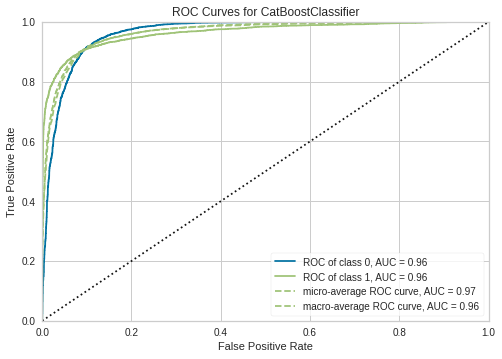

In [14]:
plot_model(tuned_model, plot='auc')

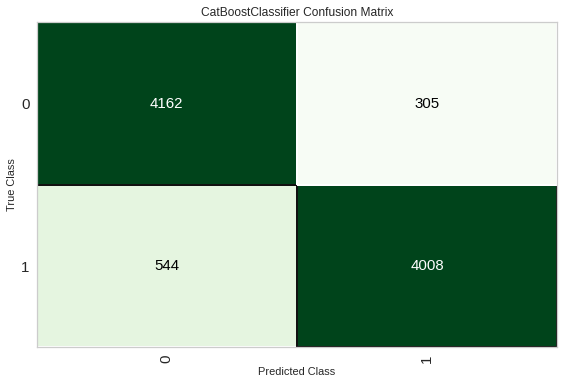

In [15]:
plot_model(model, plot='confusion_matrix')

In [16]:
predict_model(tuned_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9076,0.9633,0.8877,0.9262,0.9066,0.8153,0.8161


In [18]:
final_model = finalize_model(tuned_model)

In [24]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

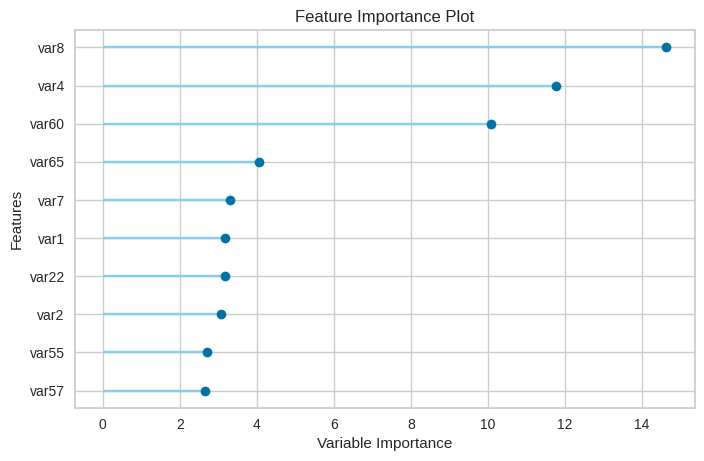

In [19]:
plot_model(final_model, plot='feature')

In [22]:
final_model

In [25]:
pred = predict_model(final_model, test)

In [26]:
pred

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var61,var62,var63,var64,var65,var66,var67,var68,Label,Score
0,0,5,126,1353,28956,743,1289,27,-999,1,...,0.166641,0.049108,0.986882,0.016683,-999.0,-999.0,0.176471,0.253676,1,0.9538
1,2,6,126,1446,7803,5151,935,35,-999,3,...,0.217009,0.144403,0.892028,0.038323,-999.0,-999.0,0.147059,0.099265,1,0.5824
2,4,5,44,243,4325,1109,1903,33,24,1,...,0.330680,0.072864,0.930373,0.021052,-999.0,-999.0,0.294118,0.136029,1,0.6158
3,7,4,53,419,743,7750,183,35,-999,3,...,0.244936,0.158088,0.986882,0.022649,-999.0,-999.0,0.294118,0.220588,0,0.7411
4,15,4,126,1863,22693,5625,965,9,-999,3,...,0.252794,0.080405,0.944501,0.021806,-999.0,-999.0,0.352941,0.113971,0,0.7668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21178,35297,4,126,1460,13335,9048,620,35,27,3,...,0.326307,0.132833,0.968718,0.039626,-999.0,-999.0,0.323529,0.253676,0,0.9894
21179,35298,18,19,532,14837,2590,855,27,20,3,...,0.229354,0.052108,0.940464,0.016952,-999.0,-999.0,0.088235,0.209559,0,0.9694
21180,35300,4,126,2923,16685,3162,1604,35,-999,3,...,0.179781,0.029155,0.745711,0.020158,-999.0,-999.0,0.205882,0.161765,1,0.8017
21181,35302,5,-999,-999,367,7637,1389,35,-999,3,...,0.149598,0.032583,0.891019,0.012596,-999.0,-999.0,-999.000000,0.246324,0,0.6136


In [27]:
sub_pred = pred[['id', 'Label']]

In [28]:
names_columns = {
    'id': 'id', 
    'Label': 'predicted'
}
sub_pred = sub_pred.rename(columns=names_columns)

In [29]:
sub_pred.to_csv('submission/08.csv', index=False)